In [1140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta
import yfinance as yf

In [1141]:
# df = pd.read_csv("AMZN.csv")
df = yf.download('AMZN','2020-04-01','2022-04-01')

[*********************100%***********************]  1 of 1 completed


In [1142]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,96.648499,97.248001,94.650002,95.385002,95.385002,82438000
2020-04-02,95.082001,96.376503,94.500000,95.941498,95.941498,86720000
2020-04-03,95.557503,96.316498,94.457497,95.329498,95.329498,72198000
2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000
2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000


In [1143]:
df.shape

(505, 6)

In [1144]:
df.columns = df.columns.str.replace(' ','_')

In [1145]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2020-04-01,96.648499,97.248001,94.650002,95.385002,95.385002,82438000
1,2020-04-02,95.082001,96.376503,94.500000,95.941498,95.941498,86720000
2,2020-04-03,95.557503,96.316498,94.457497,95.329498,95.329498,72198000
3,2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000
4,2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000


In [1146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       505 non-null    datetime64[ns]
 1   Open       505 non-null    float64       
 2   High       505 non-null    float64       
 3   Low        505 non-null    float64       
 4   Close      505 non-null    float64       
 5   Adj_Close  505 non-null    float64       
 6   Volume     505 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


In [1147]:
df['Date'] = pd.to_datetime(df['Date'])

In [1148]:
df.info()
df.set_index('Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       505 non-null    datetime64[ns]
 1   Open       505 non-null    float64       
 2   High       505 non-null    float64       
 3   Low        505 non-null    float64       
 4   Close      505 non-null    float64       
 5   Adj_Close  505 non-null    float64       
 6   Volume     505 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


In [1149]:
# # EMA
# df['SMA'] = df['Close'].rolling(window=250).mean()
# df.head()


In [1150]:
# plt.figure(figsize=(10,4))
# plt.plot(df.index,df['Close'])
# plt.plot(df.index,df['EMA'])
# plt.plot(df.index,df['SMA'])
# plt.show()

In [1151]:
# model_matrix_fig = df.corr()
# plt.figure(figsize=(7,7))
# sns.heatmap(model_matrix_fig, vmax=.8, square=True, cmap="BuPu",annot=True);
# plt.show()

In [1152]:
# SMA AND EMA dont dictate closing prices but are calculated on closing prices. So an increase in either of those wont make sense to compare the 
#corelation with the closing because closing actually determines EMA and SMA

# What we can instead do is an EMA and SMA crossover. 
# We can see if a crossover would influence closing or not like 0,1 for NO,YES resp

# sma_period_short = 50
# sma_period_long = 200
# ema_period_short = 50
# ema_period_long = 200

# df['SMA_short'] = df['Close'].rolling(window=sma_period_short).mean()
# df['SMA_long'] = df['Close'].rolling(window=sma_period_long).mean()
# df['EMA_short'] = df['Close'].ewm(span=ema_period_short, adjust=False).mean()
# df['EMA_long'] = df['Close'].ewm(span=ema_period_long, adjust=False).mean()


# df['SMA_crossover'] = np.where(df['SMA_short'] > df['SMA_long'],1,0)
# df['EMA_crossover'] = np.where(df['EMA_short'] > df['EMA_long'],1,0)

# df.head()

In [1153]:
# model_matrix_fig = df.corr()
# plt.figure(figsize=(7,7))
# sns.heatmap(model_matrix_fig, vmax=.8, square=True, cmap="BuPu",annot=True);
# plt.show()



In [1154]:
# Experiment of correlation failed miserably. Even the crossovers dont provide high correlation with any OHLC data. Strange
# Lets use RSI and MACD

df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()

macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

df['EMA12'] = ema12
df['EMA26'] = ema26
df['MACD'] = macd
df['MACD_signal'] = signal
df['MACD_hist'] = histogram

df.head()

# df['macd'] = ta.trend.MACD(df['Close'], window_slow=26, window_fast=12, window_sign=9).macd()
# signal = pd.DataFrame(df['macd'].ewm(span = 9, adjust = False).mean()).rename(columns = {'macd':'signal'})
# df['signal'] = signal





# plt.figure(figsize=(13,5))
# plt.plot(df.index,MACD,color = 'red')
# plt.plot(df.index,signal,color = 'blue')
# plt.legend(loc='upper left')
# plt.show()

,Open,High,Low,Close,Adj_Close,Volume,RSI,EMA12,EMA26,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,
2020-04-01,96.648499,97.248001,94.650002,95.385002,95.385002,82438000,NaN,95.385002,95.385002,0.000000,0.000000,0.000000
2020-04-02,95.082001,96.376503,94.500000,95.941498,95.941498,86720000,NaN,95.470617,95.426224,0.044393,0.008879,0.035514
2020-04-03,95.557503,96.316498,94.457497,95.329498,95.329498,72198000,NaN,95.448906,95.419059,0.029847,0.013072,0.016775
2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000,NaN,96.130536,95.749462,0.381074,0.086673,0.294401
2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000,NaN,96.815069,96.107280,0.707789,0.210896,0.496893


In [1155]:
df.shape

(505, 12)

In [1156]:
# RSI does not give proper correlation with close. MACD over 200,100 and 50 days gives a correlation with the closing.

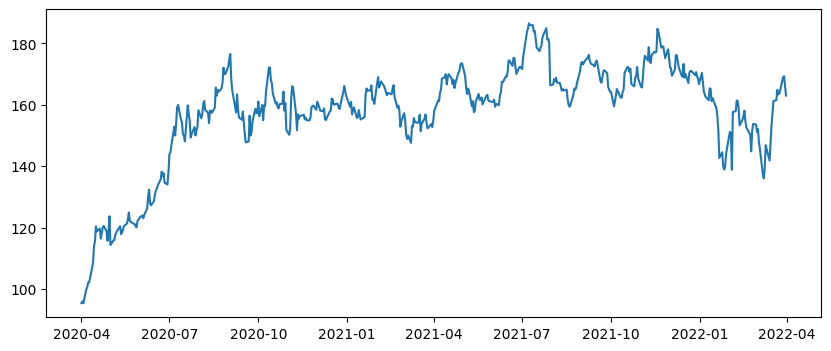

In [1157]:
plt.figure(figsize=(10,4))
plt.plot(df.index,df['Close'])
plt.show()

In [1158]:
# def _exponential_smooth(data, alpha):
#     return data.ewm(alpha=alpha).mean()

# data = _exponential_smooth(df, 0.65)

# tmp1 = data.iloc[-120:]
# data['Close'].plot()

# data = data.dropna()

In [1159]:
import yfinance as yf

APPL = yf.download('AAPL','2020-04-01','2022-04-01')
MSFT = yf.download('MSFT','2020-04-01','2022-04-01')
GOOG = yf.download('GOOG','2020-04-01','2022-04-01')
VIX = yf.download("^VIX", '2020-04-01','2022-04-01')
usdx = yf.download('DX-Y.NYB', '2020-04-01','2022-04-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


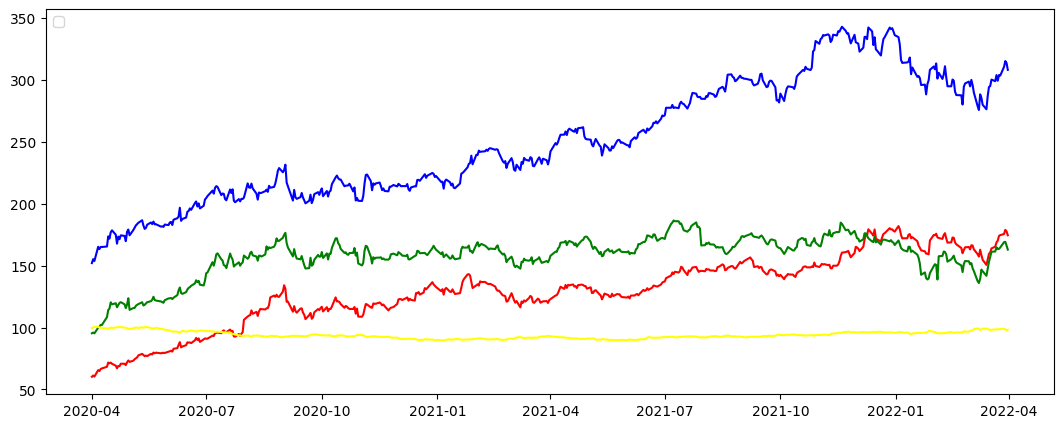

In [1160]:
df['APPL'] = APPL['Close']
df['MSFT'] = MSFT['Close']
df['GOOG'] = GOOG['Close']
df['VIX'] = VIX['Close']
df['USDX'] = usdx['Close']
plt.figure(figsize=(13,5))
plt.plot(df.index,df['APPL'],color = 'red')
plt.plot(df.index,df['MSFT'],color = 'blue')
plt.plot(df.index,df['Close'],color = 'green')
plt.plot(df.index,df['USDX'],color = 'yellow')
plt.legend(loc='upper left')
plt.show()



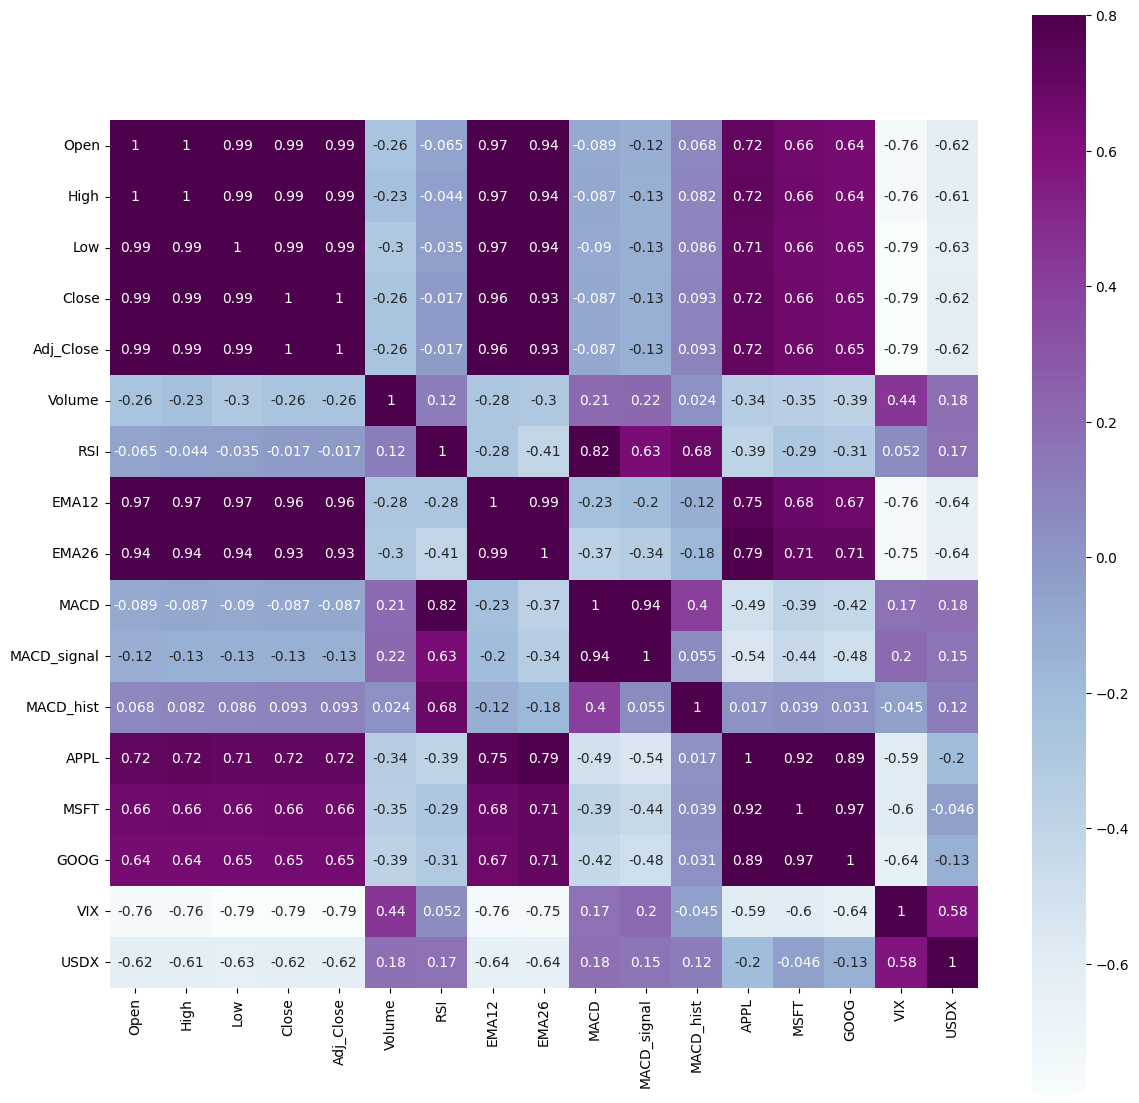

,Open,High,Low,Close,Adj_Close,Volume,RSI,EMA12,EMA26,MACD,MACD_signal,MACD_hist,APPL,MSFT,GOOG,VIX,USDX
Open,1.000000,0.995358,0.994433,0.987955,0.987955,-0.259098,-0.064712,0.971170,0.940205,-0.089348,-0.123723,0.068049,0.715162,0.657473,0.641457,-0.764176,-0.620468
High,0.995358,1.000000,0.993759,0.994572,0.994572,-0.226619,-0.043522,0.969098,0.937891,-0.087134,-0.126820,0.082356,0.720287,0.663596,0.643036,-0.760502,-0.611264
Low,0.994433,0.993759,1.000000,0.994748,0.994748,-0.296919,-0.035389,0.967164,0.936422,-0.089606,-0.130984,0.086162,0.711871,0.660529,0.648216,-0.790726,-0.629943
Close,0.987955,0.994572,0.994748,1.000000,1.000000,-0.260441,-0.017351,0.964895,0.933907,-0.087305,-0.131134,0.093066,0.716001,0.663656,0.646830,-0.785288,-0.619197
Adj_Close,0.987955,0.994572,0.994748,1.000000,1.000000,-0.260441,-0.017351,0.964895,0.933907,-0.087305,-0.131134,0.093066,0.716001,0.663656,0.646830,-0.785288,-0.619197
Volume,-0.259098,-0.226619,-0.296919,-0.260441,-0.260441,1.000000,0.122555,-0.280462,-0.299303,0.207941,0.217823,0.023615,-0.335078,-0.350614,-0.386174,0.443177,0.182861
RSI,-0.064712,-0.043522,-0.035389,-0.017351,-0.017351,0.122555,1.000000,-0.280582,-0.409241,0.815430,0.626179,0.683764,-0.387334,-0.286911,-0.309608,0.051503,0.170434
EMA12,0.971170,0.969098,0.967164,0.964895,0.964895,-0.280462,-0.280582,1.000000,0.988911,-0.228319,-0.202565,-0.120928,0.751466,0.683524,0.673711,-0.759360,-0.642650
EMA26,0.940205,0.937891,0.936422,0.933907,0.933907,-0.299303,-0.409241,0.988911,1.000000,-0.370376,-0.336012,-0.176932,0.792181,0.711342,0.707504,-0.750656,-0.641115
MACD,-0.089348,-0.087134,-0.089606,-0.087305,-0.087305,0.207941,0.815430,-0.228319,-0.370376,1.000000,0.935796,0.403537,-0.493115,-0.388115,-0.424333,0.171519,0.183384


In [1161]:
model_matrix_fig = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(model_matrix_fig, vmax=.8, square=True, cmap="BuPu",annot=True);
plt.show()

model_matrix_fig

In [1162]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume,RSI,EMA12,EMA26,MACD,MACD_signal,MACD_hist,APPL,MSFT,GOOG,VIX,USDX
Date,,,,,,,,,,,,,,,,,
2020-04-01,96.648499,97.248001,94.650002,95.385002,95.385002,82438000,NaN,95.385002,95.385002,0.000000,0.000000,0.000000,60.227501,152.110001,55.280998,57.060001,99.669998
2020-04-02,95.082001,96.376503,94.500000,95.941498,95.941498,86720000,NaN,95.470617,95.426224,0.044393,0.008879,0.035514,61.232498,155.259995,56.042000,50.910000,100.180000
2020-04-03,95.557503,96.316498,94.457497,95.329498,95.329498,72198000,NaN,95.448906,95.419059,0.029847,0.013072,0.016775,60.352501,153.830002,54.894001,46.799999,100.580002
2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000,NaN,96.130536,95.749462,0.381074,0.086673,0.294401,65.617500,165.270004,59.346001,45.240002,100.690002
2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000,NaN,96.815069,96.107280,0.707789,0.210896,0.496893,64.857498,163.490005,59.325500,46.700001,99.980003


In [1163]:
df = df.dropna()

In [1164]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'RSI', 'EMA12',
       'EMA26', 'MACD', 'MACD_signal', 'MACD_hist', 'APPL', 'MSFT', 'GOOG',
       'VIX', 'USDX'],
      dtype='object')

In [1165]:
df.drop(['Open', 'High', 'Low', 'Adj_Close'], axis=1, inplace=True)

In [1166]:
df['Close'].shape

(492,)

In [1167]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

Y = df['Close']
df.drop(['Close'],axis=1,inplace=True)
# Prepare data
X = df[df.columns]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1,1)) # Changing from 1D to 2D array since fit transform needs 2D array


In [1168]:

train_size = int(len(df) * 0.8)
train_X, test_X = X[:train_size], X[train_size:]
train_Y, test_Y = Y[:train_size], Y[train_size:]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1])) # LSTM requires 3D input -> Samples, timestep, features
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# Rows is Samples
# Features is Columns


In [1169]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(LSTM(96, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss=MeanSquaredError(), optimizer=Adam())
early_stop = EarlyStopping(monitor='val_loss', patience=55, verbose=1)
history = model.fit(train_X, train_Y, epochs=80, batch_size=16, validation_data=(test_X, test_Y), callbacks=[early_stop],verbose=2,shuffle=False)
# history = model.fit(train_X, train_Y, epochs=100, batch_size=64, validation_data=(test_X, test_Y), verbose=2, shuffle=False)




Epoch 1/80
25/25 - 3s - loss: 0.1937 - val_loss: 0.0344 - 3s/epoch - 115ms/step
Epoch 2/80
25/25 - 0s - loss: 0.0174 - val_loss: 0.0576 - 116ms/epoch - 5ms/step
Epoch 3/80
25/25 - 0s - loss: 0.0202 - val_loss: 0.0387 - 108ms/epoch - 4ms/step
Epoch 4/80
25/25 - 0s - loss: 0.0147 - val_loss: 0.0376 - 108ms/epoch - 4ms/step
Epoch 5/80
25/25 - 0s - loss: 0.0112 - val_loss: 0.0381 - 118ms/epoch - 5ms/step
Epoch 6/80
25/25 - 0s - loss: 0.0093 - val_loss: 0.0358 - 116ms/epoch - 5ms/step
Epoch 7/80
25/25 - 0s - loss: 0.0077 - val_loss: 0.0339 - 110ms/epoch - 4ms/step
Epoch 8/80
25/25 - 0s - loss: 0.0066 - val_loss: 0.0316 - 138ms/epoch - 6ms/step
Epoch 9/80
25/25 - 0s - loss: 0.0057 - val_loss: 0.0290 - 137ms/epoch - 5ms/step
Epoch 10/80
25/25 - 0s - loss: 0.0049 - val_loss: 0.0266 - 133ms/epoch - 5ms/step
Epoch 11/80
25/25 - 0s - loss: 0.0043 - val_loss: 0.0242 - 130ms/epoch - 5ms/step
Epoch 12/80
25/25 - 0s - loss: 0.0037 - val_loss: 0.0221 - 130ms/epoch - 5ms/step
Epoch 13/80
25/25 - 0s - l

In [1170]:
test_loss = model.evaluate(test_X, test_Y, verbose=0)
yhat = model.predict(test_X)

yhat = scaler.inverse_transform(yhat)
test_Y = scaler.inverse_transform(test_Y)

print('Test loss: ', test_loss)


4/4 [==============================] - 0s 3ms/step
Test loss:  0.006911149714142084


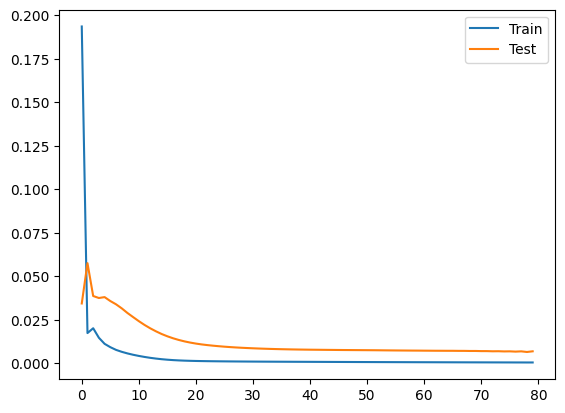

In [1171]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()


In [1172]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_Y, yhat)
rmse = np.sqrt(mean_squared_error(test_Y, yhat))
r2 = r2_score(test_Y, yhat)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R²: ', r2)


MAE:  5.126181708441841
RMSE:  6.007920563153969
R²:  0.7519342943936094


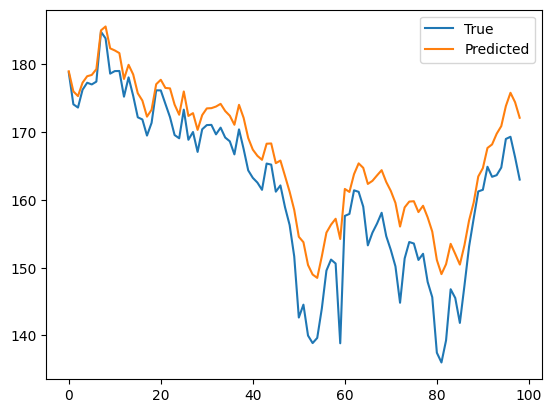

In [1173]:
import matplotlib.pyplot as plt

plt.plot(test_Y, label='True')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [1174]:
test = yf.download('AMZN','1998-04-01','2018-04-01')

[*********************100%***********************]  1 of 1 completed


In [1175]:
df.columns

Index(['Volume', 'RSI', 'EMA12', 'EMA26', 'MACD', 'MACD_signal', 'MACD_hist',
       'APPL', 'MSFT', 'GOOG', 'VIX', 'USDX'],
      dtype='object')

In [1176]:
def data_prep(start_date, end_date):
    df = yf.download('AMZN',start_date,end_date)
    APPL = yf.download('AAPL',start_date,end_date)
    MSFT = yf.download('MSFT',start_date,end_date)
    GOOG = yf.download('GOOG',start_date,end_date)
    VIX = yf.download("^VIX", start_date,end_date)
    usdx = yf.download('DX-Y.NYB', start_date,end_date)


    df = df.reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    df['APPL'] = APPL['Close']
    df['MSFT'] = MSFT['Close']
    df['GOOG'] = GOOG['Close']
    df['VIX'] = VIX['Close']
    df['USDX'] = usdx['Close']

    df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()

    macd = ema12 - ema26
    signal = macd.ewm(span=9, adjust=False).mean()
    histogram = macd - signal

    df['EMA12'] = ema12
    df['EMA26'] = ema26
    df['MACD'] = macd
    df['MACD_signal'] = signal
    df['MACD_hist'] = histogram

    print(df.info)
    df.columns = df.columns.str.replace(' ','_')
    df = df.dropna()
    df.drop(['Open', 'High', 'Low', 'Adj_Close'], axis=1, inplace=True)
    y_data = df['Close']
    df.drop(['Close'], axis=1, inplace=True)
    X_data = df
    return X_data,y_data

In [1177]:
X,y = data_prep('1998-04-01','2018-04-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
1998-04-01   0.355208   0.376563   0.350130   0.375521   0.375521  289032000   
1998-04-02   0.379688   0.403125   0.373958   0.396094   0.396094  332856000   
1998-04-03   0.401042   0.401563   0.384375   0.387500   0.387500  233880000   
1998-04-06   0.392708   0.394792   0.367708   0.369271   0.369271  220488000   
1998-04-07   0.362500   0.363542   0.353125   0.358333   0.358333  2326800

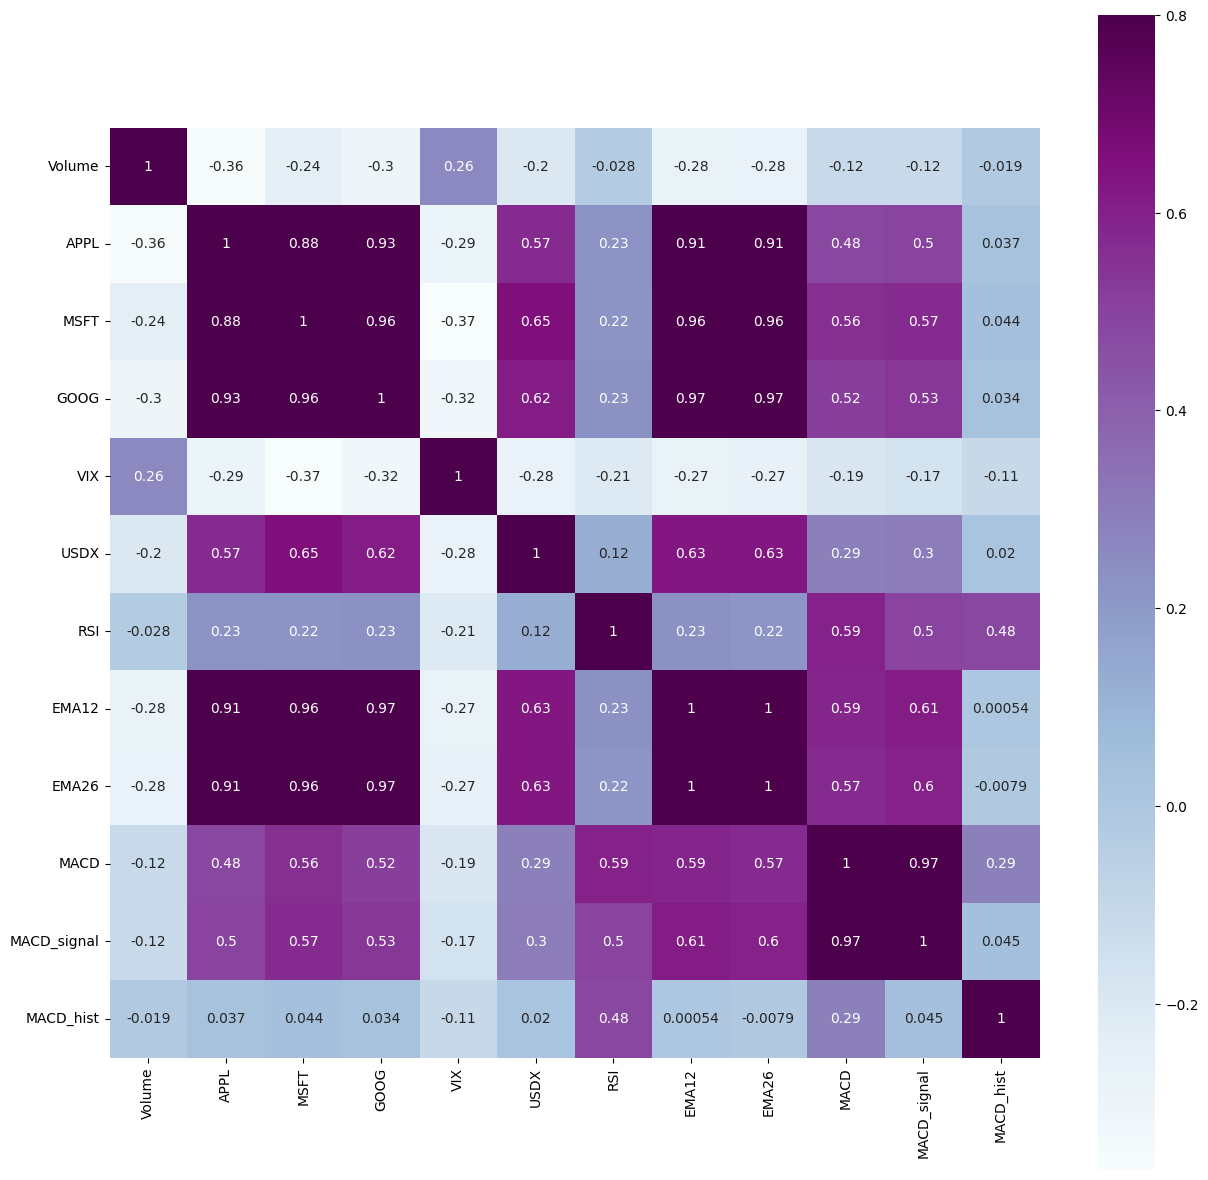

,Volume,APPL,MSFT,GOOG,VIX,USDX,RSI,EMA12,EMA26,MACD,MACD_signal,MACD_hist
Volume,1.000000,-0.358802,-0.240007,-0.299870,0.261200,-0.198538,-0.028237,-0.276309,-0.277584,-0.115745,-0.115976,-0.019040
APPL,-0.358802,1.000000,0.877559,0.931934,-0.294664,0.568203,0.226486,0.905353,0.906533,0.482961,0.495009,0.036987
MSFT,-0.240007,0.877559,1.000000,0.957072,-0.368279,0.654206,0.222600,0.962953,0.962886,0.559404,0.573175,0.043550
GOOG,-0.299870,0.931934,0.957072,1.000000,-0.321402,0.616519,0.231226,0.965743,0.966953,0.516863,0.531145,0.034269
VIX,0.261200,-0.294664,-0.368279,-0.321402,1.000000,-0.277868,-0.210721,-0.272797,-0.271954,-0.186969,-0.166433,-0.110832
USDX,-0.198538,0.568203,0.654206,0.616519,-0.277868,1.000000,0.124891,0.627776,0.629814,0.292679,0.300668,0.019783
RSI,-0.028237,0.226486,0.222600,0.231226,-0.210721,0.124891,1.000000,0.231618,0.218300,0.594674,0.495055,0.483879
EMA12,-0.276309,0.905353,0.962953,0.965743,-0.272797,0.627776,0.231618,1.000000,0.999727,0.587991,0.614277,0.000539
EMA26,-0.277584,0.906533,0.962886,0.966953,-0.271954,0.629814,0.218300,0.999727,1.000000,0.568915,0.596555,-0.007934
MACD,-0.115745,0.482961,0.559404,0.516863,-0.186969,0.292679,0.594674,0.587991,0.568915,1.000000,0.968344,0.293363


In [1178]:
model_matrix_fig = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(model_matrix_fig, vmax=.8, square=True, cmap="BuPu",annot=True);
plt.show()

model_matrix_fig

In [1179]:
print(X.shape)
print(y.shape)

X.info()


(3425, 12)
(3425,)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3425 entries, 2004-08-19 to 2018-03-29
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Volume       3425 non-null   int64  
 1   APPL         3425 non-null   float64
 2   MSFT         3425 non-null   float64
 3   GOOG         3425 non-null   float64
 4   VIX          3425 non-null   float64
 5   USDX         3425 non-null   float64
 6   RSI          3425 non-null   float64
 7   EMA12        3425 non-null   float64
 8   EMA26        3425 non-null   float64
 9   MACD         3425 non-null   float64
 10  MACD_signal  3425 non-null   float64
 11  MACD_hist    3425 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 347.9 KB


In [1180]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X.values)
y = scaler.fit_transform(y.values.reshape(-1, 1))
print(X.shape)
print(y.shape)

(3425, 12)
(3425, 1)


In [1181]:
X = X.reshape((X.shape[0], 1, X.shape[1]))
predictions = model.predict(X)

108/108 [==============================] - 0s 3ms/step


In [1182]:
actual_predictions = scaler.inverse_transform(predictions)
actual_y = scaler.inverse_transform(y)

In [1183]:
print(actual_y)

[[ 1.93149996]
 [ 1.97549999]
 [ 1.97249997]
 ...
 [74.85250092]
 [71.57099915]
 [72.36699677]]


In [1184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actual_y, actual_predictions)
rmse = np.sqrt(mean_squared_error(actual_y, actual_predictions))
r2 = r2_score(actual_y, actual_predictions)

print('MAE:', mae)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 6.183938906215621
RMSE: 7.366433513842438
R²: 0.7801120798535054


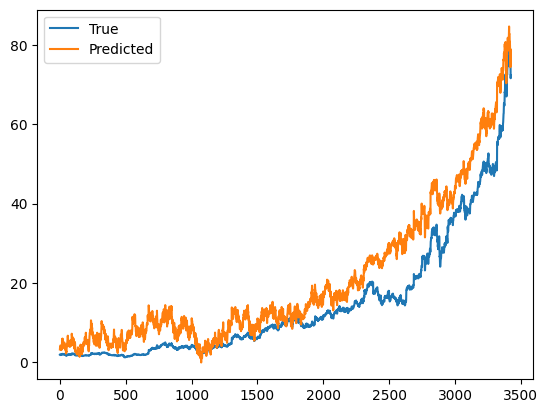

In [1185]:
import matplotlib.pyplot as plt

plt.plot(actual_y, label='True')
plt.plot(actual_predictions, label='Predicted')
plt.legend()
plt.show()